## This program calculates the average values for metrics that relate to a stock's valuation, profitability, growth, and price performance, separated by sector.  

In [13]:
import requests
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
from itertools import cycle
from csv import reader
import seaborn as sns
import numpy as np
import statistics
import ast
import sys
import time
import os
import csv

In [33]:
sectors = ['basicmaterials', 
#            'communicationservices', 
#            'consumercyclical', 'consumerdefensive', 'energy',
#           'financial', 'healthcare', 'industrials', 'realestate',
#           'technology', 'utilities'
          ]

In [34]:
rawURL = 'https://finviz.com/screener.ashx?v=152&c=0,1,2,3,4,5,6,8,9,10,11,13,17,18,20,22,23,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,51&f=sec_'
# path = 'C:\\Users\\faiza\\OneDrive\\Desktop\\StockData\\Sector Data\\'


for i in range(len(sectors)):
    URL = rawURL + sectors[i]
    #print(URL)

In [35]:
def getProxies(inURL):
    page = requests.get(inURL)
    soup = BeautifulSoup(page.text, 'html.parser')
    terms = soup.find_all('tr')
    IPs = []

    for x in range(len(terms)):  
        
        term = str(terms[x])        
        
        if '<tr><td>' in str(terms[x]):
            pos1 = term.find('d>') + 2
            pos2 = term.find('</td>')

            pos3 = term.find('</td><td>') + 9
            pos4 = term.find('</td><td>US<')
            
            IP = term[pos1:pos2]
            port = term[pos3:pos4]
            
            if '.' in IP and len(port) < 6:
                IPs.append(IP + ":" + port)
                #print(IP + ":" + port)

    return IPs 


agent = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
proxyURL = "https://www.us-proxy.org/"
pxs = getProxies(proxyURL)
proxyPool = cycle(pxs)

# Scrape data from website and save to csv files

In [36]:
header = 'Index, Symbol, Company Name, Sector, Industry, Country, Market Cap, Forward PE, PEG, Price/Sales, Price/Book, Price/FCF, EPS This Y, EPS Next Y, EPS Next 5Y, EPS Q/Q, Sales Q/Q, ROA, ROE, ROI, Current Ratio, Quick Ratio, LT Debt/Equity, Debt/Equity, Gross Margin, Operating Margin, Net Margin, Perf Month, Perf Quarter, Perf Half Y, Perf Year, Perf YTD, Volatility (Month)' + '\n'
allData = []

In [37]:
for i in range(len(sectors)):
    
    pageCounter = 1
    stocksAdded = 20
    stockData = []

    while stocksAdded == 20:

        stocksAdded = 0

        URL = rawURL + sectors[i] + '&r=' + str(pageCounter)

        #print(URL, pageCounter)

        page = requests.get(URL, headers=agent, proxies = {"http": next(proxyPool)})
        soup = BeautifulSoup(page.content, 'html.parser')

        tableLightStocks = soup.find_all('tr', {'class': 'table-light-row-cp'})
        tableDarkStocks = soup.find_all('tr', {'class': 'table-dark-row-cp'})

        tableStocks = list(tableLightStocks) + list(tableDarkStocks)

        for result in tableStocks:

            result = str(result)
            rawString = result
            data = ''

            while '<' in rawString:

                rawString = rawString[rawString.find('<') + 3 : ]
                stng = rawString[rawString.find('>') + 1 : rawString.find('<')]

                if len(stng) > 0:
                    data += stng.replace('&amp;', '&').replace(',', '') + ', '

            data = '[' + data[3 : -2] + ']'

            stockData.append([tuple(map(str, data.split(', '))) ])
            allData.append([tuple(map(str, data.split(', '))) ])
            stocksAdded += 1

        pageCounter += 20
        #print(stocksAdded)


    MyFile = open('SectorData - ' + sectors[i] + '.csv', 'w')
    MyFile.write(header)

    for row in stockData:
        MyFile.write(clean(str(row)))
        MyFile.write('\n')

    MyFile.close()
    print('Saved:', sectors[i])

                      
print(stockData)
        

Saved: basicmaterials
[[('[2', 'AAU', 'Almaden Minerals Ltd.', 'Basic Materials', 'Gold', 'Canada', '54.14M', '-', '-', '-', '0.89', '-', '20.80%', '-', '-', '54.70%', '-', '-3.90%', '-4.10%', '-', '24.00', '24.00', '0.04', '0.04', '-', '-', '-', '-6.73%', '-24.05%', '-43.90%', '-36.33%', '-10.79%', '4.86%]')], [('[4', 'AEM', 'Agnico Eagle Mines Limited', 'Basic Materials', 'Gold', 'Canada', '13.78B', '19.30', '7.30', '3.62', '2.43', '24.11', '6.00%', '5.90%', '2.60%', '77.40%', '73.40%', '7.90%', '13.30%', '7.20%', '1.80', '0.80', '0.26', '0.29', '57.60%', '30.50%', '19.80%', '-9.57%', '-18.37%', '5.80%', '-26.23%', '-16.93%', '2.24%]')], [('[6', 'AGI', 'Alamos Gold Inc.', 'Basic Materials', 'Gold', 'Canada', '3.83B', '14.83', '-', '3.48', '0.91', '11.51', '49.50%', '10.93%', '-', '-', '54.60%', '0.70%', '0.80%', '5.40%', '3.30', '2.10', '0.00', '0.00', '59.70%', '8.80%', '2.70%', '-1.72%', '-12.60%', '10.83%', '-19.15%', '-8.80%', '3.09%]')], [('[8', 'ALTO', 'Alto Ingredients Inc.', 

In [38]:
# 创建SectorData - AllSectors.csv 空文件，并填充headers

MyFile = open('SectorData - AllSectors.csv', 'w')
MyFile.write(header)

for row in allData:
    MyFile.write(clean(str(row)))
    MyFile.write('\n')

MyFile.close()

## This is a helper function for the `stockratings.py` file.

The method computes the average values for a specified metric for the provided sector after removing outliers

This method is used to evaluate the stock's rating, by comparing it to its overall sector.

## The function has three outputs: 
1. **Smoothed Avg**: Represents the average value of the specified metric for the sector after removing outliers 


2. **Start**: This represents an optimal value for the specified metric for the sector. If a certain stock's metric has a value that is greater or lower than this number, it receives a grade of A+, as shown in the file `SP&500StockRatings.csv`. In the case that a lower value for the metric is considered "better", return the 10th percentile and if not, return the 90th percentile


3. **Stdev**: Represents the standard deviation of the values of all the metrics for the sector. This number is used to provide each stock with a letter grade, it is what separates an A+ and an A.


 


technology raw net margin Avg: -4.245932203389832 4.865131082635197

Metrics Available: ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']

Avg 3.0 Start 19.03 Change 4.8651


/Users/miaoyuesun/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


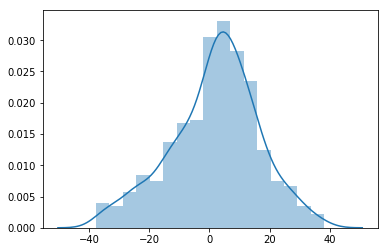

In [39]:
def getAverage(sector, metric, lessThan):
    
    with open('SectorData - ' + sector + '.csv', 'r') as rdr:
        
        csv = reader(rdr)
        sectorData = list(csv)
        
    avg = 0
    columnToSearch = 0 
    validCells = 0
    metrics = []
    
    for column in range(len(sectorData[0])):
        
        if sectorData[0][column][1: ].casefold() == metric.casefold():
            columnToSearch = column

            
    for row in range(1, len(sectorData)):
        
        cell = sectorData[row][columnToSearch].replace('%', '').replace(' ', '')
        
        if cell != '-':
            
            avg += float(cell)
            metrics.append(float(cell))
            validCells += 1
    
    elements = np.array(metrics)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)

    for i in range(2):
        smoothedList = [x for x in metrics if (x > mean - 2 * sd)]
        smoothedList = [x for x in smoothedList if (x < mean + 2 * sd)]

        mean = np.mean(smoothedList, axis=0)
        sd = np.std(smoothedList, axis=0)

    metricAvg = avg / validCells 
    stdev = np.std(smoothedList, axis = 0) / 3
    
    
    start = np.percentile(smoothedList, 90)
    smoothedAvg =  np.percentile(smoothedList, 50)
    
    if lessThan == True:
        start = np.percentile(smoothedList, 10)
    
    sns.distplot(smoothedList);
    
    print(sector + ' raw ' + metric + ' Avg:', metricAvg, stdev)
    print('\nMetrics Available:', [metric[1 : ] for metric in sectorData[0][7 : ]])
    
    return smoothedAvg, start, stdev
    

sectorData = []

smoothAvg, start, change = getAverage('technology', 'net margin', False)
print('\nAvg', smoothAvg, 'Start', str(start)[0:6], 'Change', str(change)[0:6])

In [40]:
header = [sector for sector in sectors]
header = ' ,' + (" ".join(header)).replace(' ', ', ') + '\n'
header

' ,basicmaterials\n'

## Save all metric averages in a csv file

In [41]:
sectors

['basicmaterials']

/Users/miaoyuesun/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


basicmaterials raw Forward PE Avg: 21.001485714285707 2.3609280111882875

Metrics Available: ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']
basicmaterials raw PEG Avg: 5.11138888888889 0.6037194869125001

Metrics Available: ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']
basicmaterials raw Price/Sales Avg: 10.947477477477474 1.5591411608762167

Metrics Available: ['Forward P

basicmaterials raw Perf Half Y Avg: 4.814630350194554 7.7318776775477716

Metrics Available: ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']
basicmaterials raw Perf Year Avg: 70.49253968253971 21.053305231155317

Metrics Available: ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']
basicmaterials raw Perf YTD Avg: 20.211312741312728 9.889044815982892

Metrics Available: ['Forwar

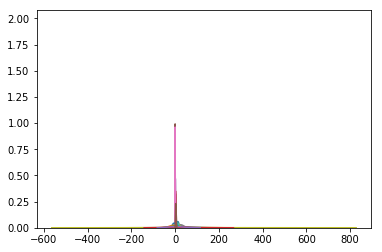

In [42]:
avgData = []
metrics = ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'EPS This Y', 'EPS Next Y', 'EPS Next 5Y', 'EPS Q/Q', 'Sales Q/Q', 'ROA', 'ROE', 'ROI', 'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin', 'Operating Margin', 'Net Margin', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Volatility (Month)']
lessThanMetrics = ['Forward PE', 'PEG', 'Price/Sales', 'Price/Book', 'Price/FCF', 'LT Debt/Equity', 'Debt/Equity', 'Volatility (Month)']


for metric in metrics:
    
    stng = ''
    
    for sector in sectors:
        
        lessThan = False
        if metric in lessThanMetrics: lessThan = True
        
        smoothAvg, start, change = getAverage(sector, metric, lessThan)
        
        if sector == 'basicmaterials': stng += str(metric) + ', ' + str(smoothAvg) + ', '
        else: stng += str(smoothAvg) + ', '
    
    
    stng = stng[:-2]
    avgData.append([stng])

In [43]:
def clean(stng):
    
    output = ''

    for letter in stng:
        if letter not in "[]()'": #and letter != ' ':
            output += letter
        
    return output

In [44]:
MyFile = open('AverageSectorMetrics.csv', 'w')
MyFile.write(header)

for row in avgData:
    MyFile.write(clean(str(row)))
    MyFile.write('\n')

MyFile.close()
print('Saved to: '+'AverageSectorMetrics.csv')

Saved to: AverageSectorMetrics.csv


# AIO

In [45]:
import requests
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from itertools import cycle
from datetime import date
from csv import reader
import numpy as np
from tqdm import tqdm   
import sys
import time
import os
import csv

In [60]:
symbols = []
stockCounter = 0
c = 0

overall = []
outputPrint = []
sectorData = []

today = date.today()
d = today.strftime("%m/%d/%y")


path = 'SectorData\\'
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}


# With this repository, you can generate data from each stock in the S&P500, Mid Cap stocks, or Small Cap stocks. 

stockSetNum = ''
stockSet = ''


try:
    stockSetNum = float(input('Which set of stocks do you want to get the ratings for?\nEnter 1 for S&P500 stocks\nEnter 2 for Mid Cap stocks over $2B Market Cap \nEnter 3 for stocks over $300 Mln Market Cap\nEnter 4 for stocks under $2B Market Cap\n'))
except:
    print('\n**Enter 1, 2, 3, or 4 to represent the set of stocks you want to get the ratings for**')


if stockSetNum == 1:
    stockSet = 'S&P500'
elif stockSetNum == 2:
    stockSet = 'MidCap'
elif stockSetNum == 3:
    stockSet = 'SmallCapOver300'
elif stockSetNum == 4:
    stockSet = 'SmallCapUnder2B'


Which set of stocks do you want to get the ratings for?
Enter 1 for S&P500 stocks
Enter 2 for Mid Cap stocks over $2B Market Cap 
Enter 3 for stocks over $300 Mln Market Cap
Enter 4 for stocks under $2B Market Cap
1


In [64]:
# This is where'S&P500Symbols.csv' and 'MidCap+2BSymbols.csv' are located  
symbolsFileName = stockSet + 'Symbols.csv'


if os.path.isdir('StockRatings') == False:

    # Creating the Symbol Data Folder
    stockRatingsDir = "StockRatings"
    parentDir = os.getcwd()
    stockRatingsPath = os.path.join(parentDir, stockRatingsDir) 
    os.mkdir(stockRatingsPath) 


# This is where the all the Excel files for the Stock Ratings are stored
saveToFileName = stockSet + 'StockRatings' + str(d).replace('/', '.') + '.csv'


def getProxies(inURL):

    page = requests.get(inURL)
    soup = BeautifulSoup(page.text, 'html.parser')
    terms = soup.find_all('tr')
    IPs = []

    for x in range(len(terms)):  
        
        term = str(terms[x])        
        
        if '<tr><td>' in str(terms[x]):
            pos1 = term.find('d>') + 2
            pos2 = term.find('</td>')

            pos3 = term.find('</td><td>') + 9
            pos4 = term.find('</td><td>US<')
            
            IP = term[pos1:pos2]
            port = term[pos3:pos4]
            
            if '.' in IP and len(port) < 6:
                IPs.append(IP + ":" + port)
                #print(IP + ":" + port)

    return IPs

In [62]:
proxyURL = "https://www.us-proxy.org/"
pxs = getProxies(proxyURL)
proxyPool = cycle(pxs)


def clean(stng):
    
    output = ''

    for letter in stng:
        if letter != '[' and letter != ']' and letter != "'": #and letter != ' ':
            output += letter
        
    return output


def fixString(stng):
    
    output = ''
    output2 = ''
    
    if '&amp;' in stng:
        output += stng[0 : stng.find('&') + 1]
        output += stng[stng.find(';') + 1 : ]
    else:
        output = stng
    
    for letter in output:
        if letter != ',' and letter.isalpha():
            output2 += letter

    return output2


def getSectorStats(sector, metric, lessThan):

    with open(path + 'SectorData - ' + sector + '.csv', 'r') as rdr:
        
        csv = reader(rdr)
        sectorData = list(csv)
        
    avg = 0
    columnToSearch = 0 
    validCells = 0
    metrics = []
    
    for column in range(len(sectorData[0])):
        
        if sectorData[0][column][1: ].casefold() == metric.casefold():
            columnToSearch = column

            
    for row in range(1, len(sectorData)):
        
        cell = sectorData[row][columnToSearch].replace('%', '').replace(' ', '')
        
        if cell != '-':
            
            avg += float(cell)
            metrics.append(float(cell))
            validCells += 1
    
    elements = np.array(metrics)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)

    for i in range(2):
        smoothedList = [x for x in metrics if (x > mean - 2 * sd)]
        smoothedList = [x for x in smoothedList if (x < mean + 2 * sd)]

        mean = np.mean(smoothedList, axis=0)
        sd = np.std(smoothedList, axis=0)
    
    metricAvg = avg / validCells 
    stdev = np.std(smoothedList, axis = 0) / 3
    
    percentile = np.percentile(smoothedList, 90)

    if lessThan == True:
        percentile = np.percentile(smoothedList, 10)
    
    return percentile, stdev


def convertNum2(stng):
    
    s = ''

    if len(stng) > 20:
        return 0

    for x in range(len(stng)):
        if x != len(stng) - 1 and stng[x] == '-' and stng[x + 1] != '-':
            s += stng[x]
        
        elif stng[x] == '.':
            s += stng[x]

        elif x != len(stng) - 1 and stng[x] != ',' and stng[x] != "'" and stng[x] != '"' and (not stng[x].isalpha()) and stng[x] != ':' and stng[x].isdigit() and stng[x + 1] != '"':
            s += stng[x]

    if len(s) > 0 and len(s) < 10:
        try:
            return float(s)
        except:
            return 0

    return 0


def convertNum(stng):

    output = ''

    for x in range(len(stng)):

        if stng[x].isdigit() or stng[x] == '.' or (x != len(stng) - 1 and stng[x] == '-' and stng[x + 1].isdigit()):
            output += stng[x]

    try:
        return float(output)
    except:
        return 0


def convertToLetterGrade(num):
    
    output = 'F'

    if num == 4.3:
        output = 'A+'
    elif num >= 4.0:
        output = 'A'
    elif num >= 3.7:
        output = 'A-'
    elif num >= 3.3:
        output = 'B+'
    elif num >= 3:
        output = 'B'
    elif num >= 2.7:
        output = 'B-'
    elif num >= 2.3:
        output = 'C+'
    elif num >= 2:
        output = 'C'
    elif num >= 1.7:
        output = 'C-'
    elif num >= 1.3:
        output = 'D+'
    elif num >= 1:
        output = 'D'
    elif num >= 0.7:
        output = 'D-'

    return output
    

def getGrade(mtrc, val, sector):

    start = 0
    change = 0
    lessThan = False
    grade = 'F'

    if mtrc == 'Forward PE':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)
        
        if val == 0:
            return 'D'

    if mtrc == 'PEG':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'
    
    if mtrc == 'Price/Sales':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'Price/Book':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'Price/FCF':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0: 
            return 'D'

    if mtrc == 'Net Margin':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'C'

    if mtrc == 'Operating Margin':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'C'

    if mtrc == 'Gross Margin':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'B'

    if mtrc == 'ROE':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'ROA':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'EPS This Y':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'F'

    if mtrc == 'EPS Next Y':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'F'

    if mtrc == 'EPS Next 5Y':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'C'

    if mtrc == 'Sales Q/Q':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'EPS Q/Q':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'Perf Month':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'C'

    if mtrc == 'Perf Quarter':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'C'

    if mtrc == 'Perf Half Y':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'D'

    if mtrc == 'Perf Year':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'F'

    if mtrc == 'Perf YTD':
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val == 0:
            return 'F'

    if mtrc == 'Volatility (Month)':
        lessThan = True
        start, change = getSectorStats(sector, mtrc, lessThan)

        if val > 9.5:
            return 'F-'


    if lessThan == True:

        if val < start:
            grade = 'A+'
        elif val < start + change:
            grade = 'A'
        elif val < start + (change * 2):
            grade = 'A-'
        elif val < start + (change * 3):
            grade = 'B+'
        elif val < start + (change * 4):
            grade = 'B'
        elif val < start + (change * 5):
            grade = 'B-'
        elif val < start + (change * 6):
            grade = 'C+'
        elif val < start + (change * 7):
            grade = 'C'
        elif val < start + (change * 8):
            grade = 'C-'
        elif val < start + (change * 9):
            grade = 'D+'
        elif val < start + (change * 10):
            grade = 'D'
        elif val < start + (change * 11):
            grade = 'D-'

    else:

        if val > start:
            grade = 'A+'
        elif val > start - change:
            grade = 'A'
        elif val > start - (change * 2):
            grade = 'A-'
        elif val > start - (change * 3):
            grade = 'B+'
        elif val > start - (change * 4):
            grade = 'B'
        elif val > start - (change * 5):
            grade = 'B-'
        elif val > start - (change * 6):
            grade = 'C+'
        elif val > start - (change * 7):
            grade = 'C'
        elif val > start - (change * 8):
            grade = 'C-'
        elif val > start - (change * 9):
            grade = 'D+'
        elif val > start - (change * 10):
            grade = 'D'
        elif val > start - (change * 11):
            grade = 'D-'

    
    #print(mtrc, val, start, change, sector, grade)

    return grade


def getCategoryGrade(sector, arr):
    
    score = 0
    grade = "F"
    output = []

    for x in range(len(arr)):
        output.append(getGrade(arr[x][0], arr[x][1], sector))

    for grade in output:

        if grade == 'A+':
            score += 4.3
        if grade == 'A':
            score += 4
        if grade == 'A-':
            score += 3.7
        if grade == 'B+':
            score += 3.3
        if grade == 'B':
            score += 3
        if grade == 'B-':
            score += 2.7
        if grade == 'C+':
            score += 2.3
        if grade == 'C':
            score += 2 
        if grade == 'C-':
            score += 1.7
        if grade == 'D+':
            score += 1.3
        if grade == 'D':
            score += 1
        if grade == 'D-':
            score += 0.7
        if grade == 'F-':
            score -= 1.5

    #print(output)
    return score / len(arr)


def getOverallRating(valGrade, profGrade, grGrade, pfGrade, vol):
    
    return (valGrade + profGrade + grGrade + pfGrade) * 6.3  


def getStockData(sym):

    global overall

    page = requests.get('https://finviz.com/quote.ashx?t=' + sym, headers=agent, proxies = {"http": next(proxyPool)})
    soup2 = BeautifulSoup(page.text, 'html.parser')
    soup = str(BeautifulSoup(page.text, 'html.parser'))

    valuationStats = []
    profitabilityStats = []
    growthStats = []
    perfStats = []

    rawMarketCap = soup[soup.find('Market capitalization') : soup.find('Market capitalization') + 200]
    marketCap = rawMarketCap[rawMarketCap.find('<b>') + 3 : rawMarketCap.find('</b>')]

    rawCompanyName = soup[soup.find('id="ticker">') + 100 : soup.find('id="ticker">') + 500]
    companyName = rawCompanyName[rawCompanyName.find('<b>') + 3 : rawCompanyName.find('</b>')]

    rawSector = rawCompanyName[rawCompanyName.find('f=sec') : rawCompanyName.find('f=sec') + 100]
    sector = rawSector[rawSector.find('>') + 1 : rawSector.find('</a>') + 1].replace(' ', '')
    sector = fixString(sector)

    rawIndustry = rawCompanyName[rawCompanyName.find('f=ind') : rawCompanyName.find('f=ind') + 100]
    industry = rawIndustry[rawIndustry.find('>') + 1 : rawIndustry.find('</a>')]


    if not (len(industry) <= 1 or ' Fund' in industry):

        ##Valuation

        rawforwardPE = soup[soup.find('Forward P/E') : soup.find('Forward P/E') + 150]
        forwardPE = convertNum(rawforwardPE[rawforwardPE.find('<b>') + 3 : rawforwardPE.find('</b>') + 1])

        #if forwardPE == 0:
            #forwardPE = convertNum(rawforwardPE[rawforwardPE.find(';') + 3 : rawforwardPE.find('</span>') + 1])

        rawPEG = soup[soup.find('PEG') : soup.find('PEG') + 150]
        peg = convertNum(rawPEG[rawPEG.find('<b>') + 3 : rawPEG.find('</b>') + 1])

        #if peg == 0:
            #peg = convertNum(rawPEG[rawPEG.find(';') + 3 : rawPEG.find('</span>') + 1])

        rawPriceSales = soup[soup.find('P/S') : soup.find('P/S') + 150]
        priceSales = convertNum(rawPriceSales[rawPriceSales.find('<b>') + 3 : rawPriceSales.find('</b>') + 1])

        #if priceSales == 0:
            #priceSales = convertNum(rawPriceSales[rawPriceSales.find(';') + 3 : rawPriceSales.find('</span>') + 1])

        rawPriceBook = soup[soup.find('P/B') : soup.find('P/B') + 150]
        #priceBook = convertNum(rawPriceBook[rawPriceBook.find(';') + 3 : rawPriceBook.find('</span>') + 1])

        #if priceBook == 0:
        priceBook = convertNum(rawPriceBook[rawPriceBook.find('<b>') + 3 : rawPriceBook.find('</b>') + 1])

        rawPriceFCF = soup[soup.find('P/FCF') : soup.find('P/FCF') + 150]
        priceFCF = convertNum(rawPriceFCF[rawPriceFCF.find('<b>') + 3 : rawPriceFCF.find('</b>') + 1])

        #if priceFCF == 0:
            #priceFCF = convertNum(rawPriceFCF[rawPriceFCF.find(';') + 3 : rawPriceFCF.find('</span>') + 1])

        #print(sym)
        valuationStats.append(['Forward PE', forwardPE])
        valuationStats.append(['PEG', peg])
        valuationStats.append(['Price/Sales', priceSales])
        valuationStats.append(['Price/Book', priceBook])
        valuationStats.append(['Price/FCF', priceFCF])
        valuationGrade = getCategoryGrade(sector.lower(), valuationStats)

        
        #print('Valuation Grade:', valuationGrade, convertToLetterGrade(valuationGrade))


        ##Profitability

        rawProfitMargin = soup[soup.find('Profit Margin') : soup.find('Profit Margin') + 250]
        #profitMargin = convertNum(rawProfitMargin[rawProfitMargin.find(';') + 3 : rawProfitMargin.find('</span>') + 1])
    
        #if profitMargin == 0:
        profitMargin = convertNum(rawProfitMargin[rawProfitMargin.find('<b>') + 3 : rawProfitMargin.find('</b>') + 1])

        rawOperMargin = soup[soup.find('Operating Margin') : soup.find('Operating Margin') + 250]
        #operMargin = convertNum(rawOperMargin[rawOperMargin.find(';') + 3 : rawOperMargin.find('</span>') + 1])
    
        #if operMargin == 0:
        operMargin = convertNum(rawOperMargin[rawOperMargin.find('<b>') + 3 : rawOperMargin.find('</b>') + 1])

        rawGrossMargin = soup[soup.find('Gross Margin') : soup.find('Gross Margin') + 250]
        grossMargin = convertNum(rawGrossMargin[rawGrossMargin.find('<b>') + 3 : rawGrossMargin.find('</b>') + 1])

        #if grossMargin == 0:
            #grossMargin = convertNum(rawGrossMargin[rawGrossMargin.find(';') + 3 : rawGrossMargin.find('</span>') + 1])

        rawROE = soup[soup.find('ROE') : soup.find('ROE') + 250]
        #roe = convertNum(rawROE[rawROE.find(';') + 3 : rawROE.find('</span>') + 1])

        #if roe == 0:
        roe = convertNum(rawROE[rawROE.find('<b>') + 3 : rawROE.find('</b>') + 1])

        rawROA = soup[soup.find('ROA') : soup.find('ROA') + 250]
        #roa = convertNum(rawROA[rawROA.find(';') + 3 : rawROA.find('</span>') + 1])
        
        #if roa == 0:
        roa = convertNum(rawROA[rawROA.find('<b>') + 3 : rawROA.find('</b>') + 1])
        
        profitabilityStats.append(['Net Margin', profitMargin])
        profitabilityStats.append(['Operating Margin', operMargin])
        profitabilityStats.append(['Gross Margin', grossMargin])
        profitabilityStats.append(['ROE', roe])
        profitabilityStats.append(['ROA', roa])
        profitabilityGrade = getCategoryGrade(sector.lower(), profitabilityStats)

        #print('Profitability Grade:', profitabilityGrade, convertToLetterGrade(profitabilityGrade))


        ##Growth

        rawEPSThisY = soup[soup.find('EPS this Y') : soup.find('EPS this Y') + 250]
        #epsThisY = convertNum(rawEPSThisY[rawEPSThisY.find(';') + 3 : rawEPSThisY.find('</span>') + 1])

        #if epsThisY == 0:
        epsThisY = convertNum(rawEPSThisY[rawEPSThisY.find('<b>') + 3 : rawEPSThisY.find('</b>') + 1])

        rawEPSNextY = soup[soup.find('EPS growth next year') : soup.find('EPS growth next year') + 250]
        #epsNextY = convertNum(rawEPSNextY[rawEPSNextY.find('<b>') + 3 : rawEPSNextY.find('</b>') + 1])

        #if epsNextY == 0:
        epsNextY = convertNum(rawEPSNextY[rawEPSNextY.find('<b>') + 3 : rawEPSNextY.find('</b>') + 1])

        rawEPSNext5Y = soup[soup.find('EPS next 5Y') : soup.find('EPS next 5Y') + 250]
        #epsNext5Y = convertNum(rawEPSNext5Y[rawEPSNext5Y.find('<b>') + 3 : rawEPSNext5Y.find('</b>') + 1])

        #if epsNext5Y == 0:
        epsNext5Y = convertNum(rawEPSNext5Y[rawEPSNext5Y.find('<b>') + 3 : rawEPSNext5Y.find('</b>') + 1])

        rawSalesQQ = soup[soup.find('Sales Q/Q') : soup.find('Sales Q/Q') + 250]
        #salesQQ = convertNum(rawSalesQQ[rawSalesQQ.find(';') + 3 : rawSalesQQ.find('</span>') + 1])

        #if salesQQ == 0:
        salesQQ = convertNum(rawSalesQQ[rawSalesQQ.find('<b>') + 3 : rawSalesQQ.find('</b>') + 1])

        rawEPSQQ = soup[soup.find('EPS Q/Q') : soup.find('EPS Q/Q') + 250]
        #epsQQ = convertNum(rawEPSQQ[rawEPSQQ.find(';') + 3 : rawEPSQQ.find('</span>') + 1])

        #if epsQQ == 0:
        epsQQ = convertNum(rawEPSQQ[rawEPSQQ.find('<b>') + 3 : rawEPSQQ.find('</b>') + 1])

        growthStats.append(['EPS This Y', epsThisY])
        growthStats.append(['EPS Next Y', epsNextY])
        growthStats.append(['EPS Next 5Y', epsNext5Y])
        growthStats.append(['Sales Q/Q', salesQQ])
        growthStats.append(['EPS Q/Q', epsQQ])
        growthGrade = getCategoryGrade(sector.lower(), growthStats)

        #print('Growth Grade:', growthGrade, convertToLetterGrade(growthGrade))


        ##Performance

        rawPerfMonth = soup[soup.find('Perf Month') : soup.find('Perf Month') + 250]
        #perfMonth = convertNum(rawPerfMonth[rawPerfMonth.find(';') + 3 : rawPerfMonth.find('</span>') + 1])

        #if perfMonth == 0:
        perfMonth = convertNum(rawPerfMonth[rawPerfMonth.find('<b>') + 3 : rawPerfMonth.find('</b>') + 1])

        rawPerfQuarter = soup[soup.find('Perf Quarter') : soup.find('Perf Quarter') + 250]
        #perfQuarter = convertNum(rawPerfQuarter[rawPerfQuarter.find(';') + 3 : rawPerfQuarter.find('</span>') + 1])

        #if perfQuarter == 0:
        perfQuarter = convertNum(rawPerfQuarter[rawPerfQuarter.find('<b>') + 3 : rawPerfQuarter.find('</b>') + 1])

        rawPerfHalfY = soup[soup.find('Perf Half Y') : soup.find('Perf Half Y') + 250]
        #perfHalfY = convertNum(rawPerfHalfY[rawPerfHalfY.find(';') + 3 : rawPerfHalfY.find('</span>') + 1])

        #if perfHalfY == 0:
        perfHalfY = convertNum(rawPerfHalfY[rawPerfHalfY.find('<b>') + 3 : rawPerfHalfY.find('</b>') + 1])

        rawPerfYear = soup[soup.find('Perf Year') : soup.find('Perf Year') + 250]
        #perfYear = convertNum(rawPerfYear[rawPerfYear.find(';') + 3 : rawPerfYear.find('</span>') + 1])

        #if perfYear == 0:
        perfYear = convertNum(rawPerfYear[rawPerfYear.find('<b>') + 3 : rawPerfYear.find('</b>') + 1])

        rawPerfYTD = soup[soup.find('Perf YTD') : soup.find('Perf YTD') + 250]
        #perfYTD = convertNum(rawPerfYTD[rawPerfYTD.find(';') + 3 : rawPerfYTD.find('</span>') + 1])

        #if perfYTD == 0:
        perfYTD = convertNum(rawPerfYTD[rawPerfYTD.find('<b>') + 3 : rawPerfYTD.find('</b>') + 1])

        rawVolatility = soup[soup.find('Volatility') : soup.find('Volatility') + 250]
        rawVol = rawVolatility[rawVolatility.find('<small>') + 7 : rawVolatility.find('</small>') + 1]
        volatility = convertNum(rawVol[rawVol.find(' ') + 1 : len(rawVol)])

        if volatility == 0:
            volatility = convertNum(rawVolatility[rawVolatility.find('<b>') + 3 : rawVolatility.find('</b>') + 1])
        
        perfStats.append(['Perf Month', perfMonth])
        perfStats.append(['Perf Quarter', perfQuarter])
        perfStats.append(['Perf Half Y', perfHalfY])
        perfStats.append(['Perf Year', perfYear])
        perfStats.append(['Perf YTD', perfYTD])
        perfStats.append(['Volatility (Month)', volatility])
        perfGrade = getCategoryGrade(sector.lower(), perfStats)

        #print('Performance Grade:', perfGrade, convertToLetterGrade(perfGrade))
        #print(getGrade('volatility', volatility), volatility)
        
        
        rawDividend = soup[soup.find('Dividend %') : soup.find('Dividend %') + 250]
        dividend = convertNum(rawDividend[rawDividend.find('<b>') + 3 : rawDividend.find('</b>')])

        if dividend == 0:
            dividend = convertNum(rawDividend[rawDividend.find(';') + 3 : rawDividend.find('</span>') + 1])
        

        rawSMA20 = soup[soup.find('SMA20') : soup.find('SMA20') + 250]
        #sma20 = convertNum(rawSMA20[rawSMA20.find(';">') + 3 : rawSMA20.find('</span></b></td>') - 1])
        
        #if sma20 == 0:
        sma20 = convertNum(rawSMA20[rawSMA20.find('<b>') + 3 : rawSMA20.find('</b>') + 1])

        rawSMA50 = soup[soup.find('SMA50') : soup.find('SMA50') + 250]
        #sma50 = convertNum(rawSMA50[rawSMA50.find(';">') + 3 : rawSMA50.find('</span></b></td>') - 1])

        #if sma50 == 0:
        sma50 = convertNum(rawSMA50[rawSMA50.find('<b>') + 3 : rawSMA50.find('</b>') + 1])

        rawSMA200 = soup[soup.find('SMA200') : soup.find('SMA200') + 250]
        #sma200 = convertNum(rawSMA200[rawSMA200.find(';">') + 3 : rawSMA200.find('</span></b></td>') - 1])

        #if sma200 == 0:
        sma200 = convertNum(rawSMA200[rawSMA200.find('<b>') + 3 : rawSMA200.find('</b>') + 1])

        rawInstTrans = soup[soup.find('Inst Trans') : soup.find('Inst Trans') + 250]
        instTrans = convertNum(rawInstTrans[rawInstTrans.find('%"><b>') + 3 : rawInstTrans.find('</b></td>')])

        if instTrans == 0:
            instTrans = convertNum(rawInstTrans[rawInstTrans.find(';') + 3 : rawInstTrans.find('</span>') + 1])

        rawInstOwn = soup[soup.find('Inst Own') : soup.find('Inst Own') + 250]
        instOwn = convertNum(rawInstOwn[rawInstOwn.find('%"><b>') + 3 : rawInstOwn.find('</b></td>')])

        if instOwn == 0:
            instOwn = convertNum(rawInstOwn[rawInstOwn.find(';') + 3 : rawInstOwn.find('</span>') + 1])

        rawInsiderOwn = soup[soup.find('Insider Own') : soup.find('Insider Own') + 250]
        insiderOwn = convertNum(rawInsiderOwn[rawInsiderOwn.find('%"><b>') + 3 : rawInsiderOwn.find('</b></td>')])

        if insiderOwn == 0:
            insiderOwn = convertNum(rawInsiderOwn[rawInsiderOwn.find(';') + 3 : rawInsiderOwn.find('</span>') + 1])

        rawInsiderTrans = soup[soup.find('Insider Trans') : soup.find('Insider Trans') + 250]
        insiderTrans = convertNum(rawInsiderTrans[rawInsiderTrans.find('%"><b>') + 3 : rawInsiderTrans.find('</b></td>')])

        if insiderTrans == 0:
            insiderTrans = convertNum(rawInsiderTrans[rawInsiderTrans.find(';') + 3 : rawInsiderTrans.find('</span>') + 1])

        rawTargetPrice = soup[soup.find('Target Price') : soup.find('Target Price') + 250]
        #targetPrice = convertNum(rawTargetPrice[rawTargetPrice.find(';">') + 3 : rawTargetPrice.find('</span></b>')])

        #if targetPrice == 0:
        targetPrice = convertNum(rawTargetPrice[rawTargetPrice.find('<b>') + 3 : rawTargetPrice.find('</b>') + 1])
        
        rawPrevClose = soup[soup.find('Prev Close') : soup.find('Prev Close') + 250]
        prevClose = convertNum(rawPrevClose[rawPrevClose.find('%"><b>') + 3 : rawPrevClose.find('</b></td>')])

        if prevClose == 0:
            prevClose = convertNum(rawPrevClose[rawPrevClose.find(';') + 3 : rawPrevClose.find('</span>') + 1])

        try:
            priceProjection = (targetPrice - prevClose) / prevClose * 100
        except:
            priceProjection = 0
        
        rawRSI = soup[soup.find('RSI (14)') : soup.find('RSI (14)') + 250]
        #RSI = convertNum(rawRSI[rawRSI.find(';">') + 3 : rawRSI.find('</span></b>')])

        #if RSI == 0:
        RSI = convertNum(rawRSI[rawRSI.find('<b>') + 3 : rawRSI.find('</b></td>')])
        
        rawShortFloat = soup[soup.find('Short Float') : soup.find('Short Float') + 250]
        shortFloat = convertNum(rawShortFloat[rawShortFloat.find('%"><b>') + 3 : rawShortFloat.find('</b></td>')])

        if shortFloat == 0:
            shortFloat = convertNum(rawShortFloat[rawShortFloat.find(';') + 3 : rawShortFloat.find('</span>') + 1])
        
        raw52WHigh = soup[soup.find('52W High') : soup.find('52W High') + 250]
        fifty2WeekHigh = convertNum(raw52WHigh[raw52WHigh.find('%"><b>') + 3 : raw52WHigh.find('</b></td>')])

        if fifty2WeekHigh == 0:
            fifty2WeekHigh = convertNum(raw52WHigh[raw52WHigh.find(';') + 3 : raw52WHigh.find('</span>') + 1])

        raw52WLow = soup[soup.find('52W Low') : soup.find('52W Low') + 250]
        fifty2WeekLow = convertNum(raw52WLow[raw52WLow.find('%"><b>') + 3 : raw52WLow.find('</b></td>')])

        if fifty2WeekLow == 0:
            fifty2WeekLow = convertNum(raw52WLow[raw52WLow.find(';') + 3 : raw52WLow.find('</span>') + 1])


        rawCurrRatio = soup[soup.find('Current Ratio') : soup.find('Current Ratio') + 250]
        #currRatio = convertNum(rawCurrRatio[rawCurrRatio.find(';">') + 3 : rawCurrRatio.find('</span></b>')])

        #if currRatio == 0:
        currRatio = convertNum(rawCurrRatio[rawCurrRatio.find('<b>') + 3 : rawCurrRatio.find('</b></td>')])

        rawEarningsDate = soup[soup.find('Earnings date&lt;br&gt') + 150: soup.find('Earnings date&lt;br&gt') + 300]
        earningsDate = rawEarningsDate[rawEarningsDate.find('<b>') + 3 : rawEarningsDate.find('</b></td>')]

        overallRating = getOverallRating(valuationGrade, profitabilityGrade, growthGrade, perfGrade, volatility)
        
        
        if overallRating >= 100:
            overallRating = 99

        if len(fixString(companyName)) > 2 and len(marketCap) > 2:
            overall.append([sym, fixString(companyName), marketCap, round(overallRating), 
            sector, fixString(industry), convertToLetterGrade(getCategoryGrade(sector.lower(), valuationStats)), 
            convertToLetterGrade(getCategoryGrade(sector.lower(),profitabilityStats)), convertToLetterGrade(getCategoryGrade(sector.lower(), growthStats)), 
            convertToLetterGrade(getCategoryGrade(sector.lower(), perfStats)), forwardPE, peg, priceSales, priceBook, priceFCF, profitMargin, 
            operMargin, grossMargin, roe, roa, epsThisY, epsNextY, epsNext5Y, salesQQ, epsQQ, perfMonth, perfQuarter, perfHalfY, 
            perfYTD, perfYear, sma20, sma50, sma200, dividend, instTrans, instOwn, insiderOwn, insiderTrans, targetPrice, prevClose, 
            priceProjection, RSI, shortFloat, fifty2WeekHigh, fifty2WeekLow, currRatio, earningsDate])


def getSymbolsCSV(fileName):
    
    global symbols
    print('\nLoading data from ' + fileName)

    with open(fileName) as csvfile:
    
        readCSV = csv.reader(csvfile, delimiter=',')
        
        for row in readCSV:
            
            symbol  = str(row[0]).replace('ï»¿', '')
            
            symbols.append(symbol)  


def getStockStats():

    global symbols

    for stock in tqdm(symbols):
    
        getStockData(stock)


def exportData(fileName):

    MyFile = open(fileName, 'w')

    header = 'Symbol, Company Name, Market Cap, Overall Rating, Sector, Industry, Valuation Grade, Profitability Grade, Growth Grade, Performance Grade, Forward PE, PEG, Price/Sales, Price/Book, Price/FCF, Net Margin, Operating Margin, Gross Margin, ROE, ROA, EPS This Y, EPS Next Y, EPS Next 5 Years, Sales Q/Q, EPS Q/Q, Perf Month, Perf Quarter, Perf Half Y, Perf YTD, Perf Year, SMA20, SMA50, SMA200, Dividend Yield, Inst Trans, Inst Own, Insider Own, Insider Trans, Target Price, Prev Close, Price Projection, RSI, Short Float, 52W High, 52W Low, Current Ratio, Earnings Date' + '\n'

    MyFile.write(header)

    for row in overall:
        MyFile.write(clean(str(row)))
        MyFile.write('\n')

    MyFile.close()

    print('\nSaved as ' + fileName)

In [65]:
getSymbolsCSV(symbolsFileName)


Loading data from S&P500Symbols.csv


FileNotFoundError: [Errno 2] No such file or directory: 'S&P500Symbols.csv'

In [56]:
getStockStats()

0it [00:00, ?it/s]


In [57]:
exportData(saveToFileName)


Saved as S&P500StockRatings08.30.21.csv
